In [1]:
### import libraries


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns',None)

In [2]:
# Load the Big Game Census and All States Census data
big_game_data = pd.read_excel("/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BIG GAME PROJECT/Data/Cleaned BIG GAME Census data.xlsx")
states_population = pd.read_excel("/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BIG GAME PROJECT/Data/All states Census 2017 Population Estimates.xlsx")

## How does the number of players from each state correlate with the state’s population

In [3]:
# Count players from each state
state_player_counts = big_game_data.groupby('Player Birth State').size().reset_index(name='Player Count')

In [4]:
# Extract state name and 2017 population
states_population = states_population[['Geography Name', 'Population Estimate (as of July 1) - 2017']]
states_population.rename(columns={'Geography Name': 'State', 'Population Estimate (as of July 1) - 2017': 'Population'}, inplace=True)

In [5]:
# Merge player counts with state population data
merged_data = state_player_counts.merge(states_population, left_on='Player Birth State', right_on='State', how='left')

In [ ]:
# Calculate correlation between Player Count and Population
correlation = merged_data['Player Count'].corr(merged_data['Population'])
print(f"Correlation between Player Count and Population: {correlation}")

Correlation between Player Count and Population: 0.8683898385333936


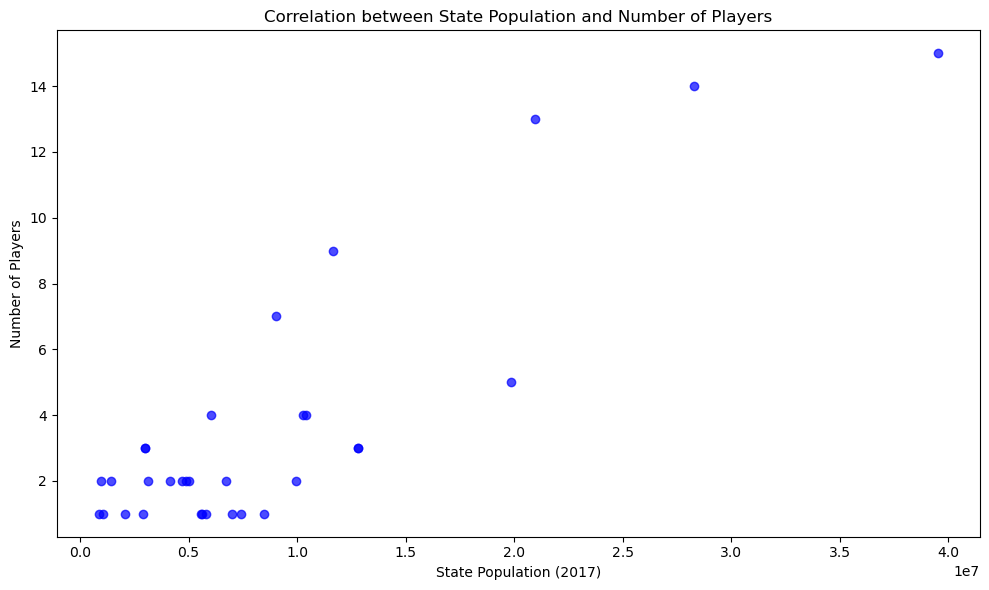

In [7]:

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Population'], merged_data['Player Count'], color='blue', alpha=0.7)
plt.xlabel('State Population (2017)')
plt.ylabel('Number of Players')
plt.title('Correlation between State Population and Number of Players')
plt.tight_layout()
plt.show()

## Which states have the highest ratio of players to population

In [11]:
# Load the Big Game Census and All States Census data
big_game_data = pd.read_excel("/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BIG GAME PROJECT/Data/Cleaned BIG GAME Census data.xlsx")
states_population = pd.read_excel("/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BIG GAME PROJECT/Data/All states Census 2017 Population Estimates.xlsx")

In [12]:
# Count players from each state
state_player_counts = big_game_data.groupby('Player Birth State').size().reset_index(name='Player Count')

In [13]:
# Extract state name and 2017 population
states_population = states_population[['Geography Name', 'Population Estimate (as of July 1) - 2017']]
states_population.rename(columns={'Geography Name': 'State', 'Population Estimate (as of July 1) - 2017': 'Population'}, inplace=True)

In [14]:
# Merge player counts with state population data
merged_data = state_player_counts.merge(states_population, left_on='Player Birth State', right_on='State', how='left')

In [15]:
# Calculate the ratio of players to population
merged_data['Player to Population Ratio'] = merged_data['Player Count'] / merged_data['Population']

In [16]:
# Sort states by the player-to-population ratio in descending order
highest_ratios = merged_data.sort_values(by='Player to Population Ratio', ascending=False)

In [18]:
# Display the top 5 states with the highest ratios
highest_ratios[['State', 'Player Count', 'Population', 'Player to Population Ratio']].head(5)

,State,Player Count,Population,Player to Population Ratio
5,Delaware,2,961939.0,0.000002
9,Hawaii,2,1427538.0,0.000001
29,South Dakota,1,869666.0,0.000001
18,Mississippi,3,2984100.0,0.000001
20,Nevada,3,2998039.0,0.000001


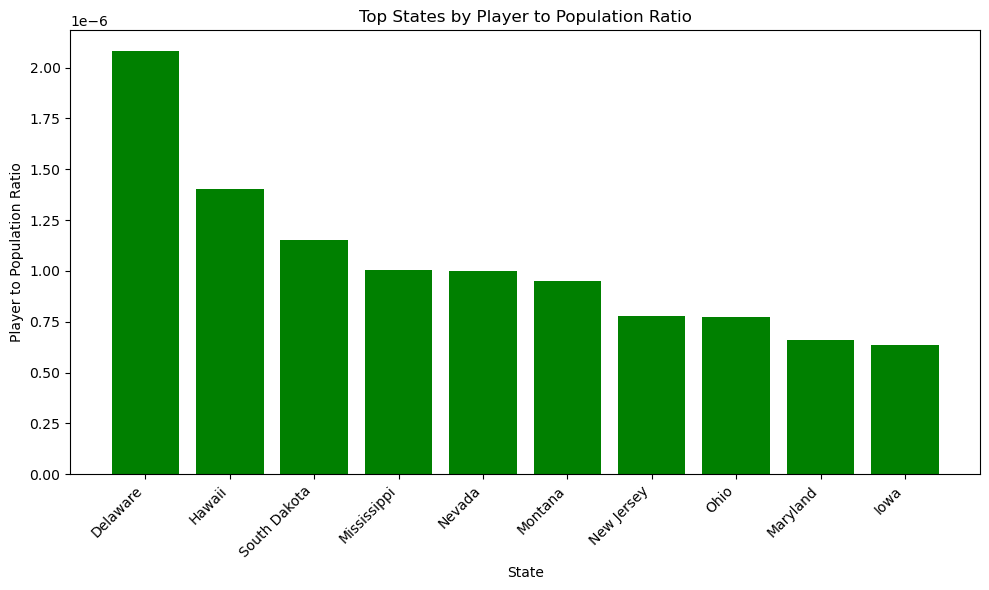

In [19]:
# Plot top states by ratio
plt.figure(figsize=(10, 6))
plt.bar(highest_ratios['State'][:10], highest_ratios['Player to Population Ratio'][:10], color='green')
plt.xlabel('State')
plt.ylabel('Player to Population Ratio')
plt.title('Top States by Player to Population Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()